In [21]:
import matplotlib.pyplot as plt
import numpy as np

# **CIFAR10**

Este conjunto de datos posee imágenes de 10 clases de la vida cotidiana como diferentes animales y vehículos

Clasificación de imágenes – CIFAR10
Vector de pesos aprendidos por cada clase (graficados en forma de matriz).

In [22]:
# w_r= np.reshape(w, (32,32,3,10))

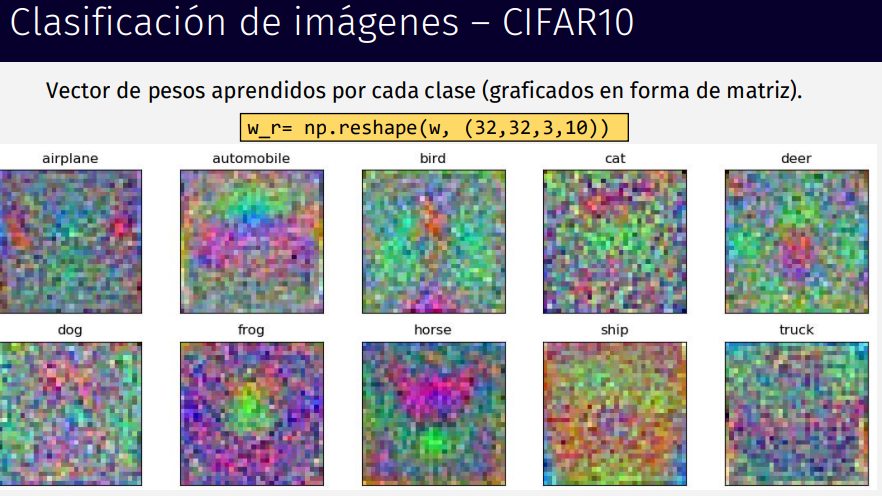

# **A. Carga de datos**

In [23]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# **B. Visualización**

Para visualizar las imágenes también puede utilizar la función plt.imshow(), pero ahora debe tener en cuenta la dimensión extra:

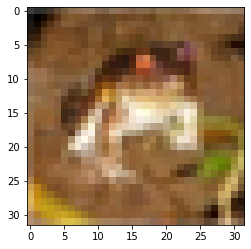

In [24]:
plt.imshow(x_train[0,:,:,:]) # se incluye la dimensión de canales

# N = Cantidad de ejemplos
# H = Alto de la imagem
# W = Ancho de la imagen

# **C. Aplanamiento**

Las imágenes de CIFAR10 son a color, por ende las dimensiones de x_train y x_test son del tipo (N,H,W,C), donde C es la cantidad de canales (3 para imágenes a color). En el caso de CIFAR10, las imágenes son de tamaño 32x32, por ende el shape de estos vectores es (N,32,32,3). En este caso
también tenemos que utilizar la capa Flatten al principio del modelo denso, pero ahora con el nuevo tamaño de entrada:

In [25]:
from keras.utils.np_utils import to_categorical

y_train_one_hot = to_categorical(y_train, 10)

In [26]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()

model.add(Flatten(input_shape=(32,32,3)))

# **D. Entrenamiento del modelo**

Entrene un modelo para clasificar las imágenes, utilizando una softmax en la capa de salida y la entropía cruzada como función de error. Mida el error y el accuracy en el conjunto de test (y el de train). Compute la matriz de confusión, pero antes de mirarla ¿qué pares de clases te parece que van a confundirse más? Recuerde normalizar los datos con anterioridad. 

In [27]:
num_classes = 10    # Cantidad de clases por ser 10 dígitos

#add model layers
model.add(Dense(num_classes, activation = 'softmax')) 
  # Softmax: Capa “lineal” o “fully-connected”. En este caso 2 neuronas con salida softmax especifican clasificación binaria.
  # input_shape: Tamaño de la entrada = Cantidad de variables del dataset

# compilar el model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# sgd = “descenso de gradiente estocástico”.
# loss = es un parámetro que indica como se mide el error y como se optimiza.
# La función  entropía cruzada es más adecuada para medir errores con targets categóricos.
# adam =  es un optimizador para el descenso del gradiente
# categorical_crossentropy es la funcion de entropia cruzada

# Imprimir resumen del modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Normalizo

In [28]:
X_train_flattened = x_train.reshape(-1)
mu = X_train_flattened.mean()
std = X_train_flattened.std()
X_train_norm = (x_train - mu) / std
X_test_norm = (x_test - mu) / std

In [29]:
EPOCAS = 30
model.fit(X_train_norm, y_train_one_hot , epochs = EPOCAS, batch_size = 32)
# EPOCAS: Epochs es la cantidad de veces que se verá todo el conjunto de datos.
# batch_size: Batch_size es la cantidad de datos que se utilizarán en cada iteración.

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1253 - accuracy: 0.3236
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0447 - accuracy: 0.3508
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0257 - accuracy: 0.3580
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0065 - accuracy: 0.3573
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0099 - accuracy: 0.3641
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9900 - accuracy: 0.3668
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9894 - accuracy: 0.3666
Epoch 8/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9855 - accuracy: 0.3661
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9730 - accuracy: 0.3707
Epoch 10/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.969

En cuanto a la siguiente pregunta: **¿qué pares de clases te parece que van
a confundirse más?** Coincidero que al igual que en el ejercicio anterior, los valores 1 y 7, los 8 y los 3, los 1 con los 7 son clases que podrían confundirse más que por ejemplo un 2 con un 4 o un 1 con un 0.

In [31]:
y_predict = model.predict(X_test_norm)
y_predict_label = np.array([np.argmax(y) for y in y_predict])

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_label)

313/313 [==============================] - 1s 2ms/step


array([[347,  59, 164,  44,  40,  33,  20,  61, 167,  65],
       [ 93, 318,  38,  33,  45,  41,  45,  42,  98, 247],
       [ 62,  36, 264, 106, 205,  55, 119,  74,  47,  32],
       [ 34,  63,  97, 272, 121, 112, 144,  38,  43,  76],
       [ 43,  34, 111,  88, 340,  64, 161,  98,  28,  33],
       [ 62,  58, 100, 207, 124, 171, 108,  86,  48,  36],
       [ 22,  35,  64, 130, 191,  38, 409,  43,  22,  46],
       [ 57,  52, 107,  63, 146,  65,  62, 323,  47,  78],
       [138,  62,  82,  34,  25,  47,  13,  22, 481,  96],
       [ 98, 107,  57,  35,  44,  27,  37,  37,  93, 465]])

# **E. CNN en CIFAR10**

Repita el mismo procedimiento que para MNIST para el conjunto de datos CIFAR10. El entrenamiento para CIFAR10 generalmente tarda más tiempo que para MNIST debido a que las imágenes tienen aproximadamente tres veces la dimensionalidad y además mayor complejidad. Por ende, pruebe sólo algunas arquitecturas distintas. Si tiene instalado Keras/TensorFlow para GPU, el entrenamiento puede ser mucho más rápido.

**Alternativa 1**

In [32]:
model = Sequential()
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(num_classes, activation= 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 14400)             0         
                                                                 
 dense_7 (Dense)             (None, 32)                460832    
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 462,954
Trainable params: 462,954
Non-trainable params: 0
________________________________________________

**Alternativa 2**

In [33]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size = 3, activation='relu', input_shape= (32, 32, 3), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = 3, activation='relu', input_shape= (32, 32, 3), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, input_dim = (32, 32, 3), activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 4096)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

**Alternativa 3**

In [34]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size = 5, activation='relu', input_shape= (32, 32, 3), padding = 'same'))
model.add(MaxPooling2D(pool_size = (8, 4)))
model.add(Conv2D(64, kernel_size = 5, activation='relu', input_shape= (32, 32, 3), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, input_dim = (32, 32, 3), activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 8, 64)          102464    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 64)               